In [2]:
import pandas as pd
import pickle
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
#from soyclustering import SphericalKMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import euclidean
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
filepath = 'data/similarity_matrix.pickle'

In [4]:
with open(filepath, 'rb') as lf :
        similarity_vector = pickle.load(lf)

In [5]:
similarity_vector

,0,1,2,3,4,5,6,7,8,9,...,4036,4037,4038,4039,4040,4041,4042,4043,4044,4045
0,1.000000,0.256973,0.046962,0.022345,0.552704,0.075223,0.001712,0.071680,0.019960,0.011358,...,0.009583,0.142222,0.087427,0.001001,0.533337,0.001952,0.001373,0.397084,0.002189,0.001261
1,0.256973,1.000000,0.039053,0.055428,0.162488,0.587823,0.024553,0.870366,0.004664,0.030578,...,0.017469,0.041505,0.014175,0.000903,0.136447,0.040755,0.001222,0.129882,0.001368,0.013006
2,0.046962,0.039053,1.000000,0.987608,0.013853,0.005404,0.001009,0.011149,0.001265,0.001868,...,0.000748,0.000851,0.001916,0.000590,0.006402,0.001141,0.000806,0.007674,0.000894,0.000742
3,0.022345,0.055428,0.987608,1.000000,0.038750,0.008426,0.000922,0.000858,0.001150,0.001790,...,0.000686,0.003869,0.000855,0.000534,0.022894,0.001112,0.103672,0.020647,0.000805,0.000686
4,0.552704,0.162488,0.013853,0.038750,1.000000,0.034791,0.001425,0.012297,0.001339,0.014394,...,0.000790,0.000901,0.016450,0.000738,0.949494,0.043668,0.000850,0.005191,0.000946,0.000784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,0.001952,0.040755,0.001141,0.001112,0.043668,0.063259,0.002345,0.089957,0.001609,0.028476,...,0.000939,0.001079,0.299728,0.001091,0.001666,1.000000,0.000979,0.001391,0.001149,0.000924
4042,0.001373,0.001222,0.000806,0.103672,0.000850,0.067919,0.000843,0.001297,0.004745,0.001592,...,0.000626,0.000711,0.000782,0.000492,0.001258,0.000979,1.000000,0.000917,0.000743,0.000623
4043,0.397084,0.129882,0.007674,0.020647,0.005191,0.107261,0.001075,0.000978,0.001332,0.002198,...,0.017535,0.268899,0.000994,0.000616,0.001823,0.001391,0.000917,1.000000,0.000921,0.723799
4044,0.002189,0.001368,0.000894,0.000805,0.000946,0.034874,0.380623,0.030692,0.188301,0.304161,...,0.016878,0.000714,0.000787,0.009934,0.043964,0.001149,0.000743,0.000921,1.000000,0.000648


In [23]:
possibility_vector = pd.read_csv('data/possibility_vector.csv')

In [24]:
possibility_vector

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.000833,0.090244,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833,...,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833,0.089265,0.134813,0.037664,0.000833
1,0.000581,0.000581,0.000581,0.000581,0.000581,0.000581,0.000581,0.000581,0.000581,0.050124,...,0.000581,0.000581,0.000581,0.000581,0.360755,0.000581,0.000581,0.036618,0.000581,0.000581
2,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,...,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.048963,0.000455,0.000455
3,0.000347,0.000347,0.000347,0.000347,0.039032,0.000347,0.000347,0.000347,0.000347,0.000347,...,0.000347,0.000347,0.000347,0.000347,0.000347,0.000347,0.098937,0.071848,0.000347,0.000347
4,0.000439,0.000439,0.000439,0.015709,0.000439,0.099857,0.000439,0.021385,0.000439,0.000439,...,0.000439,0.022328,0.000439,0.000439,0.231061,0.000439,0.000439,0.068172,0.000439,0.000439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862,...,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862
4042,0.000581,0.000581,0.000581,0.758361,0.000581,0.000581,0.000581,0.000581,0.000581,0.000581,...,0.000581,0.000581,0.000581,0.000581,0.000581,0.000581,0.000581,0.000581,0.000581,0.000581
4043,0.000301,0.000301,0.000301,0.066003,0.250578,0.000301,0.000301,0.000301,0.000301,0.000301,...,0.000301,0.142720,0.000301,0.000301,0.000301,0.012305,0.000301,0.000301,0.000301,0.000301
4044,0.000243,0.000243,0.000243,0.052034,0.000243,0.000243,0.584510,0.030618,0.000243,0.000243,...,0.000243,0.000243,0.000243,0.095442,0.000243,0.000243,0.000243,0.000243,0.000243,0.000243


In [48]:
clustered_data = pd.read_csv('data/clustered_data.csv')

In [49]:
clustered_data = clustered_data.rename(columns = {"Unnamed: 0" : "id"})

In [50]:
clustered_data = clustered_data[['cluster']]

In [51]:
clustered_data

,cluster
0,6
1,11
2,7
3,7
4,39
...,...
4041,7
4042,7
4043,7
4044,13


In [52]:
cluster_vector = pd.concat([clustered_data, possibility_vector], axis=1)

In [53]:
cluster_vector

,cluster,0,1,2,3,4,5,6,7,8,...,30,31,32,33,34,35,36,37,38,39
0,6,0.000833,0.090244,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833,...,0.000833,0.000833,0.000833,0.000833,0.000833,0.000833,0.089265,0.134813,0.037664,0.000833
1,11,0.000581,0.000581,0.000581,0.000581,0.000581,0.000581,0.000581,0.000581,0.000581,...,0.000581,0.000581,0.000581,0.000581,0.360755,0.000581,0.000581,0.036618,0.000581,0.000581
2,7,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,...,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.048963,0.000455,0.000455
3,7,0.000347,0.000347,0.000347,0.000347,0.039032,0.000347,0.000347,0.000347,0.000347,...,0.000347,0.000347,0.000347,0.000347,0.000347,0.000347,0.098937,0.071848,0.000347,0.000347
4,39,0.000439,0.000439,0.000439,0.015709,0.000439,0.099857,0.000439,0.021385,0.000439,...,0.000439,0.022328,0.000439,0.000439,0.231061,0.000439,0.000439,0.068172,0.000439,0.000439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,7,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862,...,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862
4042,7,0.000581,0.000581,0.000581,0.758361,0.000581,0.000581,0.000581,0.000581,0.000581,...,0.000581,0.000581,0.000581,0.000581,0.000581,0.000581,0.000581,0.000581,0.000581,0.000581
4043,7,0.000301,0.000301,0.000301,0.066003,0.250578,0.000301,0.000301,0.000301,0.000301,...,0.000301,0.142720,0.000301,0.000301,0.000301,0.012305,0.000301,0.000301,0.000301,0.000301
4044,13,0.000243,0.000243,0.000243,0.052034,0.000243,0.000243,0.584510,0.030618,0.000243,...,0.000243,0.000243,0.000243,0.095442,0.000243,0.000243,0.000243,0.000243,0.000243,0.000243


In [54]:
cluster_vector = data.groupby('cluster').mean()
cluster_vector

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.031071,0.011328,0.003947,0.006954,0.001880,0.012229,0.011795,0.569519,0.011024,0.004460,...,0.001221,0.005677,0.007455,0.006212,0.028019,0.003672,0.017104,0.014445,0.016176,0.008245
1,0.003910,0.010874,0.382922,0.007657,0.016938,0.010838,0.027726,0.006368,0.009610,0.021369,...,0.060279,0.009225,0.010247,0.005045,0.035446,0.002340,0.010189,0.022669,0.009960,0.008223
2,0.024694,0.008123,0.005415,0.005887,0.002541,0.006184,0.001893,0.030752,0.003674,0.001417,...,0.000961,0.007939,0.007376,0.007047,0.415583,0.001679,0.005853,0.008261,0.020942,0.000978
3,0.003612,0.000698,0.002871,0.001660,0.000824,0.005291,0.032826,0.001301,0.005367,0.006366,...,0.013074,0.001523,0.020108,0.029976,0.002931,0.010239,0.001561,0.004805,0.000790,0.742441
4,0.007505,0.007802,0.020751,0.005438,0.001493,0.011785,0.034768,0.006119,0.064839,0.029154,...,0.029820,0.002975,0.033621,0.023472,0.005883,0.032992,0.023403,0.004007,0.005982,0.035942
5,0.001854,0.016334,0.044325,0.002113,0.009574,0.005641,0.025733,0.000998,0.003329,0.020994,...,0.494317,0.001531,0.040086,0.006645,0.009297,0.008068,0.002870,0.007907,0.002731,0.034349
6,0.004927,0.016056,0.002059,0.036703,0.016261,0.012806,0.001791,0.008033,0.000605,0.000601,...,0.001655,0.021889,0.000957,0.000789,0.059302,0.001644,0.005443,0.050158,0.008287,0.000397
7,0.018840,0.018035,0.007484,0.086086,0.010490,0.022962,0.015250,0.022698,0.056622,0.009822,...,0.006692,0.072950,0.004170,0.020210,0.024720,0.006974,0.029166,0.013218,0.008660,0.004325
8,0.012714,0.017726,0.012688,0.009500,0.008893,0.007988,0.001447,0.011570,0.003890,0.004068,...,0.003874,0.021003,0.002673,0.008285,0.033079,0.005463,0.001653,0.006983,0.207303,0.008591


In [55]:
cluster_vector.sum(axis=1)

cluster
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    1.0
36    1.0
37    1.0
38    1.0
39    1.0
dtype: float64

In [56]:
possibility_vector.sum(axis=1)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4041    1.0
4042    1.0
4043    1.0
4044    1.0
4045    1.0
Length: 4046, dtype: float64

In [57]:
similarity_matrix = pd.DataFrame(cosine_similarity(cluster_vector, cluster_vector))

In [58]:
similarity_matrix

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.000000,0.050852,0.131914,0.022156,0.061370,0.021435,0.038119,0.212988,0.067888,0.219933,...,0.076946,0.051880,0.124646,0.141017,0.028029,0.048586,0.115957,0.033111,0.099138,0.133013
1,0.050852,1.000000,0.115089,0.038330,0.192540,0.272276,0.058070,0.205789,0.100241,0.257203,...,0.135110,0.203603,0.246550,0.083800,0.231375,0.179039,0.266270,0.124442,0.093027,0.286256
2,0.131914,0.115089,1.000000,0.012002,0.060643,0.032708,0.142145,0.227726,0.148647,0.740148,...,0.554513,0.045614,0.133156,0.106836,0.157980,0.056236,0.131622,0.040797,0.865077,0.799325
3,0.022156,0.038330,0.012002,1.000000,0.163543,0.097064,0.006358,0.049394,0.030037,0.059013,...,0.030946,0.829273,0.049366,0.038958,0.013247,0.179669,0.039246,0.022457,0.018381,0.037256
4,0.061370,0.192540,0.060643,0.163543,1.000000,0.235883,0.044678,0.271915,0.116613,0.216167,...,0.104951,0.429215,0.211022,0.085474,0.071366,0.314062,0.208918,0.112970,0.050698,0.225392
5,0.021435,0.272276,0.032708,0.097064,0.235883,1.000000,0.023248,0.106423,0.042826,0.098516,...,0.041760,0.552510,0.162497,0.079288,0.096172,0.335445,0.135209,0.050637,0.027486,0.122259
6,0.038119,0.058070,0.142145,0.006358,0.044678,0.023248,1.000000,0.183040,0.074039,0.287030,...,0.145555,0.036165,0.084308,0.188106,0.106370,0.028547,0.127743,0.023375,0.107679,0.226003
7,0.212988,0.205789,0.227726,0.049394,0.271915,0.106423,0.183040,1.000000,0.199320,0.663386,...,0.261571,0.155785,0.352513,0.192798,0.184917,0.119686,0.575845,0.176538,0.189122,0.508357
8,0.067888,0.100241,0.148647,0.030037,0.116613,0.042826,0.074039,0.199320,1.000000,0.239866,...,0.874902,0.066343,0.146671,0.074480,0.105737,0.048347,0.182592,0.034081,0.108264,0.268893
9,0.219933,0.257203,0.740148,0.059013,0.216167,0.098516,0.287030,0.663386,0.239866,1.000000,...,0.559326,0.167896,0.331385,0.333088,0.302024,0.134150,0.410347,0.125351,0.533968,0.878294


In [60]:
similarity_matrix.to_csv('data/similarity_matrix_of_cluster.csv')

In [61]:
nodes = pd.read_csv('nodes.csv')

In [62]:
nodes

,Id,Label,timeset,modularity_class
0,0,0,NaN,7
1,1,1,NaN,3
2,2,2,NaN,5
3,3,3,NaN,4
4,4,4,NaN,4
5,5,5,NaN,4
6,6,6,NaN,2
7,7,7,NaN,2
8,8,8,NaN,1
9,9,9,NaN,2


In [63]:
clustered_data['cluster'].value_counts()

23    291
15    178
0     166
16    165
3     154
5     154
24    152
9     150
7     132
31    124
11    121
19    113
22    108
4     107
39    107
38    106
10    103
2     103
29     90
36     90
20     87
26     86
28     85
14     82
12     80
32     76
35     76
17     76
21     72
6      68
1      66
37     65
18     65
30     61
13     55
34     51
8      50
33     45
25     43
27     43
Name: cluster, dtype: int64

In [66]:
tmp = pd.DataFrame(clustered_data['cluster'].value_counts())
tmp

,cluster
23,291
15,178
0,166
16,165
3,154
5,154
24,152
9,150
7,132
31,124


In [67]:
tmp['Id'] = tmp.index
tmp

,cluster,Id
23,291,23
15,178,15
0,166,0
16,165,16
3,154,3
5,154,5
24,152,24
9,150,9
7,132,7
31,124,31


In [68]:
nodes_new = pd.merge(nodes, tmp, on='Id')
nodes_new

,Id,Label,timeset,modularity_class,cluster
0,0,0,NaN,7,166
1,1,1,NaN,3,66
2,2,2,NaN,5,103
3,3,3,NaN,4,154
4,4,4,NaN,4,107
5,5,5,NaN,4,154
6,6,6,NaN,2,68
7,7,7,NaN,2,132
8,8,8,NaN,1,50
9,9,9,NaN,2,150


In [69]:
nodes_new = nodes_new.rename(columns = {"cluster" : "cluster_size"})

In [70]:
nodes_new

,Id,Label,timeset,modularity_class,cluster_size
0,0,0,NaN,7,166
1,1,1,NaN,3,66
2,2,2,NaN,5,103
3,3,3,NaN,4,154
4,4,4,NaN,4,107
5,5,5,NaN,4,154
6,6,6,NaN,2,68
7,7,7,NaN,2,132
8,8,8,NaN,1,50
9,9,9,NaN,2,150


In [71]:
nodes_new.to_csv('nodes_new.csv')

In [4]:
my_k = 40
my_k_hi = 2

In [49]:
similarity_matrix = pd.DataFrame(cosine_similarity(possibility_vector, possibility_vector))

Text(0, 0.5, 'Number of documents')

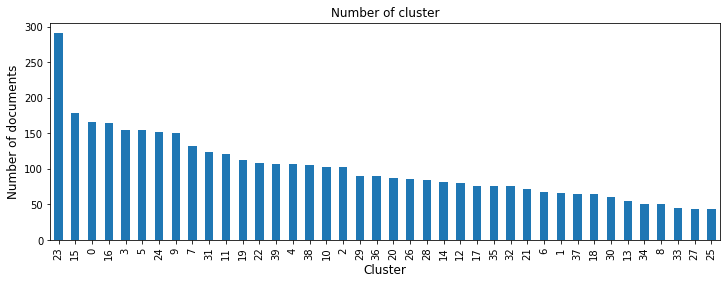

In [91]:
kmeans = KMeans(n_clusters= my_k, max_iter=100, random_state=100).fit(similarity_matrix)
clusters = kmeans.labels_

clusters = pd.DataFrame(clusters)
a = clusters[0].value_counts()

ax = a.plot(kind='bar', title='Number of cluster', figsize=(12, 4), legend=None)
ax.set_xlabel('Cluster', fontsize=12)
ax.set_ylabel('Number of documents', fontsize=12)

In [92]:
clusters

,0
0,6
1,11
2,7
3,7
4,39
...,...
4041,7
4042,7
4043,7
4044,13


In [106]:
clusters.columns = ['cluster']

In [108]:
raw_data = pd.read_csv('data/2016-2021.csv')

In [109]:
raw_data

,Unnamed: 0,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,Affiliations,Authors with affiliations,Abstract,Author Keywords,Index Keywords,Document Type,Publication Stage,Open Access,Source,EID
0,0,"Shin J.W., Oh J.H., Lee S.M., Lee S.E.",56645403600;57193057094;56333626100;55857982000;,CAN FD controller for in-vehicle system,2016,ISOCC 2016 - International SoC Design Conferen...,NaN,NaN,7799870,227,...,"Dept. of Electronic Engineering, Seoul Nationa...","Shin, J.W., Dept. of Electronic Engineering, S...","In this paper, we propose a Controller Area Ne...",CAN-FD; Embedded network; In-vehicle network,Control system synthesis; Control systems; Fin...,Conference Paper,Final,NaN,Scopus,2-s2.0-85010460391
1,1,"Kim J.K., Gwon O.S., Lee S.E.",57193067620;56646363300;55857982000;,Design of an area-efficient hardware filter fo...,2016,ISOCC 2016 - International SoC Design Conferen...,NaN,NaN,7799871,229,...,"Dept. of Electronic Engineering, Seoul Nationa...","Kim, J.K., Dept. of Electronic Engineering, Se...","In this paper, we propose an area-efficient ha...",Area-efficiency; Hardware filter; Quantization...,Bandpass filters; Embedded systems; Frequency ...,Conference Paper,Final,NaN,Scopus,2-s2.0-85010434955
2,2,"Kim H.S., Cha H.-K.",57193073064;14422204600;,A low-power capacitive-feedback CMOS neural re...,2016,ISOCC 2016 - International SoC Design Conferen...,NaN,NaN,7799786,279,...,Department of Electrical and Information Engin...,"Kim, H.S., Department of Electrical and Inform...",A low-power capacitive-feedback amplifier IC f...,Capacitive-feedback; Foldedcascode operational...,Amplifiers (electronic); CMOS integrated circu...,Conference Paper,Final,NaN,Scopus,2-s2.0-85010382711
3,3,"Kim H.S., Cha H.-K.",57193073064;14422204600;,"A low-power, low-noise neural recording amplif...",2016,ISOCC 2016 - International SoC Design Conferen...,NaN,NaN,7799784,275,...,Department of Electrical and Information Engin...,"Kim, H.S., Department of Electrical and Inform...",This paper presents a low power and low noise ...,Capacitive feedback; Neural amplifier; Neural ...,Bandwidth; Buffer amplifiers; Electrophysiolog...,Conference Paper,Final,NaN,Scopus,2-s2.0-85010379667
4,4,"Dai L., Kim C., Leibovich A.K.",57190073260;57226847451;6701753657;,Fragmentation of a jet with small radius,2016,Physical Review D,94,11,114023,NaN,...,Pittsburgh Particle Physics Astrophysics and C...,"Dai, L., Pittsburgh Particle Physics Astrophys...","In this paper, we consider the fragmentation o...",NaN,NaN,Article,Final,NaN,Scopus,2-s2.0-85012005931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,4041,"Kim M.H., Park S., Yoon J.M.",57203506363;55777146100;55377284200;,Industry portfolio allocation with asymmetric ...,2021,European Journal of Finance,27,1-2,NaN,178,...,Seoul National University of Science and Techn...,"Kim, M.H., Seoul National University of Scienc...",We develop a new framework of optimal consumpt...,dynamic and asymmetric correlation; Industry p...,NaN,Article,Final,NaN,Scopus,2-s2.0-85082405017
4042,4042,"Kim Y., Kang S.",55699655400;56814001800;,Effects of a weight control intervention based...,2021,Journal of Women and Aging,33,5,NaN,556,...,"Department of Sport Science, Seoul National Un...","Kim, Y., Department of Sport Science, Seoul Na...",The study examined the effect of a weight cont...,Middle-aged obese women; perceived benefits an...,NaN,Article,Final,NaN,Scopus,2-s2.0-85081733899
4043,4043,"Yang D., Kang Y.C., Park J.-W., Lee Y.I., Song...",57193099439;56608436100;34873006100;8866003700...,Power Smoothing of a Variable-speed Wind Turbi...,2021,"International Journal of Control, Automation a...",19,1,NaN,11,...,"School of Electrical Engineering, Nantong Univ...","Yang, D., School of Electrical Engineering, Na...",This paper presents a power-smoothing scheme o...,Control gain; energy-releasing capability; ene...,Maximum power point trackers; Turbogenerators;.

In [113]:
data = pd.merge(raw_data, clusters, left_index=True, right_index=True)

In [114]:
data.isnull().sum()

Unnamed: 0                      0
Authors                         0
Author(s) ID                    0
Title                           0
Year                            0
Source title                    2
Volume                        302
Issue                        1301
Art. No.                     2604
Page start                   1139
Page end                     1159
Page count                   4046
Cited by                     1321
DOI                           149
Link                            0
Affiliations                    0
Authors with affiliations       0
Abstract                        0
Author Keywords               522
Index Keywords               1057
Document Type                   0
Publication Stage               0
Open Access                  4046
Source                          0
EID                             0
cluster                         0
dtype: int64

In [115]:
data.to_csv('data/clustered_data.csv', index=False)

In [93]:
a

23    291
15    178
0     166
16    165
3     154
5     154
24    152
9     150
7     132
31    124
11    121
19    113
22    108
39    107
4     107
38    106
10    103
2     103
29     90
36     90
20     87
26     86
28     85
14     82
12     80
17     76
35     76
32     76
21     72
6      68
1      66
37     65
18     65
30     61
13     55
34     51
8      50
33     45
27     43
25     43
Name: 0, dtype: int64

In [9]:
lrg_cluster1 = a.index[0]
lrg_cluster2 = a.index[1]

In [10]:
clusters_large = clusters[clusters[0] == lrg_cluster1]

In [11]:
clusters_large.index

Int64Index([  53,   54,   98,  102,  110,  139,  158,  159,  162,  173,
            ...
            3738, 3806, 3818, 3819, 3904, 3916, 3917, 3947, 3988, 3995],
           dtype='int64', length=259)

In [12]:
lrg_cluster1_df = possibility_vector.loc[clusters_large.index, clusters_large.index]
lrg_cluster1_df

,53,54,98,102,110,139,158,159,162,173,...,3738,3806,3818,3819,3904,3916,3917,3947,3988,3995
53,1.000000,0.946433,0.887317,0.818401,0.873144,0.839538,0.628830,0.893546,0.703612,0.621376,...,0.743582,0.747538,0.853811,0.813759,0.714808,0.620257,0.626174,0.801390,0.768019,0.858744
54,0.946433,1.000000,0.837623,0.774818,0.826930,0.830883,0.578657,0.862111,0.680644,0.587497,...,0.676106,0.715283,0.832492,0.752892,0.771975,0.526337,0.544613,0.765674,0.713300,0.836421
98,0.887317,0.837623,1.000000,0.863314,0.895763,0.753947,0.734251,0.835990,0.836427,0.697810,...,0.791035,0.773292,0.814221,0.842120,0.646747,0.738469,0.765310,0.803158,0.810284,0.823987
102,0.818401,0.774818,0.863314,1.000000,0.841431,0.777475,0.926445,0.839496,0.807941,0.780255,...,0.815895,0.913404,0.846911,0.639044,0.657337,0.739459,0.731591,0.932869,0.905502,0.894671
110,0.873144,0.826930,0.895763,0.841431,1.000000,0.738842,0.717128,0.813229,0.825687,0.682949,...,0.707887,0.682726,0.765281,0.854664,0.655179,0.670358,0.657233,0.719193,0.712521,0.794073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,0.620257,0.526337,0.738469,0.739459,0.670358,0.560936,0.769470,0.676841,0.609601,0.675504,...,0.777408,0.785793,0.628317,0.754873,0.426022,1.000000,0.938077,0.782357,0.779038,0.722638
3917,0.626174,0.544613,0.765310,0.731591,0.657233,0.628280,0.749692,0.658989,0.651471,0.704946,...,0.806834,0.750814,0.622359,0.710808,0.429596,0.938077,1.000000,0.784410,0.788699,0.747209
3947,0.801390,0.765674,0.803158,0.932869,0.719193,0.788924,0.843458,0.861050,0.714846,0.768793,...,0.840016,0.916552,0.848485,0.603454,0.677909,0.782357,0.784410,1.000000,0.921056,0.909985
3988,0.768019,0.713300,0.810284,0.905502,0.712521,0.776841,0.883581,0.704021,0.585094,0.740102,...,0.818343,0.908798,0.704672,0.554972,0.588729,0.779038,0.788699,0.921056,1.000000,0.944818


In [13]:
clusters_large2 = clusters[clusters[0] == lrg_cluster2]

In [14]:
clusters_large2.index

Int64Index([   1,    7,   38,   49,   51,   57,   74,  104,  105,  115,
            ...
            3887, 3910, 3914, 3936, 3940, 3951, 3962, 3966, 3987, 3991],
           dtype='int64', length=256)

In [15]:
lrg_cluster2_df = possibility_vector.loc[clusters_large2.index, clusters_large2.index]
lrg_cluster2_df

,1,7,38,49,51,57,74,104,105,115,...,3887,3910,3914,3936,3940,3951,3962,3966,3987,3991
1,1.000000,0.870366,0.916566,0.904868,0.902489,0.908109,0.719578,0.935202,0.928470,0.897991,...,0.802558,0.887080,0.873283,0.823446,0.861235,0.809090,0.911161,0.912105,0.894440,0.790215
7,0.870366,1.000000,0.928573,0.913719,0.911306,0.919767,0.695038,0.901887,0.932672,0.875336,...,0.828379,0.872418,0.839141,0.750830,0.828237,0.841060,0.884349,0.889566,0.936421,0.808942
38,0.916566,0.928573,1.000000,0.972043,0.968957,0.946168,0.781496,0.926967,0.985753,0.960958,...,0.891614,0.910586,0.903054,0.903829,0.889526,0.856329,0.896173,0.906810,0.937525,0.899127
49,0.904868,0.913719,0.972043,1.000000,0.999320,0.944368,0.739995,0.888827,0.972477,0.918005,...,0.886670,0.893455,0.928997,0.859350,0.876222,0.873141,0.907658,0.927497,0.947008,0.893119
51,0.902489,0.911306,0.968957,0.999320,1.000000,0.941298,0.737727,0.886254,0.969600,0.914634,...,0.882974,0.890412,0.925554,0.855580,0.872902,0.869878,0.905059,0.924777,0.944359,0.889169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951,0.809090,0.841060,0.856329,0.873141,0.869878,0.894053,0.659210,0.803840,0.851820,0.847829,...,0.937401,0.808075,0.862147,0.821825,0.837293,1.000000,0.805805,0.813676,0.825367,0.909068
3962,0.911161,0.884349,0.896173,0.907658,0.905059,0.881898,0.717686,0.840613,0.912183,0.832945,...,0.798667,0.803342,0.932185,0.777524,0.825799,0.805805,1.000000,0.939235,0.879992,0.839033
3966,0.912105,0.889566,0.906810,0.927497,0.924777,0.890515,0.783533,0.862288,0.921954,0.849465,...,0.828879,0.888837,0.928571,0.784368,0.871839,0.813676,0.939235,1.000000,0.902378,0.852553
3987,0.894440,0.936421,0.937525,0.947008,0.944359,0.962710,0.718309,0.865874,0.937832,0.873542,...,0.840063,0.870580,0.874354,0.798748,0.844976,0.825367,0.879992,0.902378,1.000000,0.826409


Text(0, 0.5, 'Number of documents')

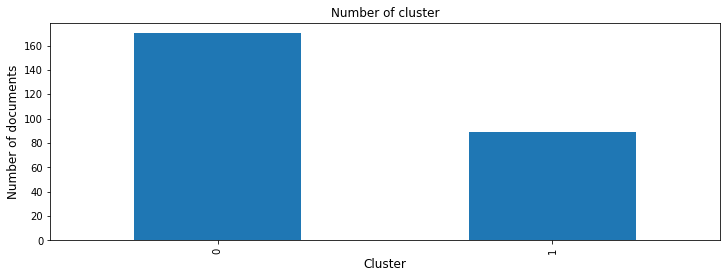

In [16]:
kmeans2 = KMeans(n_clusters= my_k_hi, random_state=1004).fit(lrg_cluster1_df)
clusters2 = kmeans2.labels_

clusters2 = pd.DataFrame(clusters2)
a2 = clusters2[0].value_counts()

ax2 = a2.plot(kind='bar', title='Number of cluster', figsize=(12, 4), legend=None)
ax2.set_xlabel('Cluster', fontsize=12)
ax2.set_ylabel('Number of documents', fontsize=12)

In [17]:
clusters2

,0
0,0
1,0
2,0
3,0
4,0
...,...
254,1
255,1
256,0
257,0


In [18]:
clusters2.index = clusters_large.index

Text(0, 0.5, 'Number of documents')

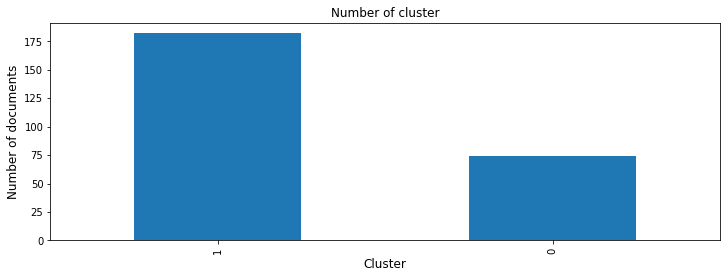

In [19]:
kmeans21 = KMeans(n_clusters= my_k_hi, random_state=1004).fit(lrg_cluster2_df)
clusters21 = kmeans21.labels_

clusters21 = pd.DataFrame(clusters21)
a21 = clusters21[0].value_counts()

ax21 = a21.plot(kind='bar', title='Number of cluster', figsize=(12, 4), legend=None)
ax21.set_xlabel('Cluster', fontsize=12)
ax21.set_ylabel('Number of documents', fontsize=12)

In [20]:
clusters21

,0
0,1
1,1
2,1
3,1
4,1
...,...
251,0
252,1
253,1
254,1


In [21]:
clusters21.index = clusters_large2.index

In [22]:
clusters21

,0
1,1
7,1
38,1
49,1
51,1
...,...
3951,0
3962,1
3966,1
3987,1


In [23]:
clusters.columns = ['org_cluster'] # this is the number of original cluster
clusters2.columns = ['lrg1_cluster'] # this is the number of small cluster in the largest cluster
clusters21.columns = ['lrg2_cluster'] # this is the number of small cluster in the 2nd largest cluster

 == New init == 
iteration: 0
1939.8703388227627
iteration: 1
3067.454073861669
iteration: 2
3263.8306906480484
iteration: 3
3332.3152506125607
iteration: 4
3357.3882808526505
iteration: 5
3368.090949319284
iteration: 6
3377.820994734362
iteration: 7
3385.427558329538
iteration: 8
3389.312720359714
iteration: 9
3391.2513857000285
iteration: 10
3393.214621609778
iteration: 11
3395.8935856864173
iteration: 12
3398.629970872994
iteration: 13
3402.7870972123424
iteration: 14
3407.3054554183964
iteration: 15
3408.873312435586
iteration: 16
3409.2449594351356
iteration: 17
3409.4483806020467
iteration: 18
3409.50882620038
iteration: 19
3409.5741531277686


Text(0, 0.5, 'Number of documents')

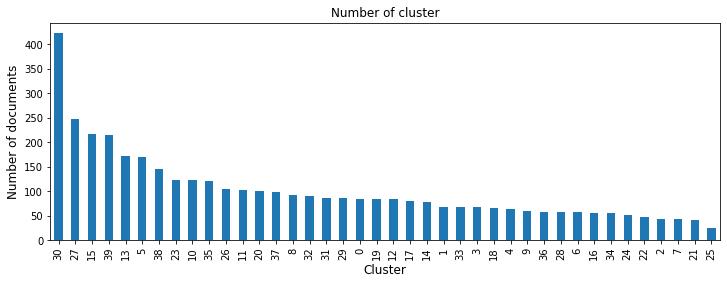

In [88]:
possibility_vector2 = possibility_vector.to_numpy()

kmeans3 = SphericalKmeans(n_clusters= my_k, random_state=1001)
s_kmeans = kmeans3.fit(possibility_vector2)
clusters3 = kmeans3.labels_

clusters3 = pd.DataFrame(clusters3)
a3 = clusters3[0].value_counts()

ax3 = a3.plot(kind='bar', title='Number of cluster', figsize=(12, 4), legend=None)
ax3.set_xlabel('Cluster', fontsize=12)
ax3.set_ylabel('Number of documents', fontsize=12)

In [33]:
a3

36    457
8     222
35    208
10    183
39    169
20    169
33    137
0     131
22    128
32    122
3     118
34    114
17    100
16     98
30     93
19     92
2      91
25     87
27     86
23     84
28     79
21     77
37     76
24     75
13     75
4      74
11     70
1      70
29     70
7      66
14     64
9      60
26     59
38     51
15     44
12     42
6      37
18     36
31     32
Name: 0, dtype: int64

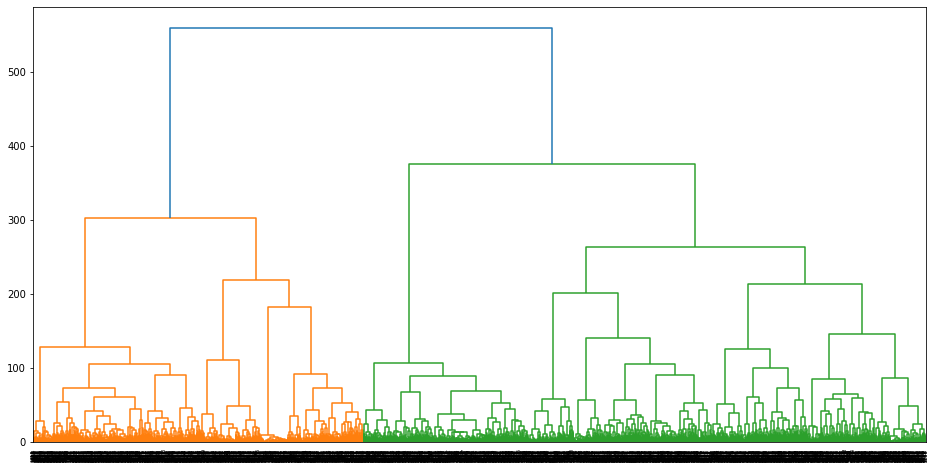

In [25]:
linked = linkage(possibility_vector, method = 'ward')

plt.figure(figsize=(16, 8))
dendrogram(linked)
plt.show()